In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from logreg_package.logreg import LogisticRegression

In [2]:
path = "../dataset/health care diabetes.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data = data.to_numpy()
data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [6]:
lr = LogisticRegression(data=data,target=-1,test_size=0.2,val_size=0.1,regularization=None)

In [7]:
lr.train(lr=0.01,n_epochs=1000,weights=None)

/Users/akshatgupta/Desktop/IIITD/SEM_5/ML/ML_Assignments/Assignment1/logreg_package/logreg.py:41: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


In [8]:
lr.predict()

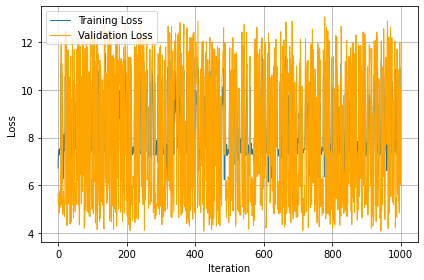

In [13]:
x_vals = lr.epochs

# fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(18,8))

plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

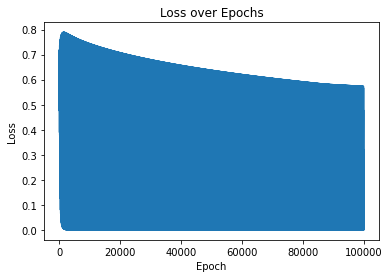

Learned weights: [ 2.81963051  6.23187558 10.30800114]
Probability of positive class: [1.]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
num_samples = 100
num_features = 2

X = np.random.randn(num_samples, num_features)
intercept = np.ones((num_samples, 1))
X = np.hstack((intercept, X))
true_weights = np.array([1.0, 2.0, 3.0])
true_labels = np.dot(X, true_weights) > 0
y = true_labels.astype(int)

# Initialize parameters
learning_rate = 0.01
num_epochs = 1000
batch_size = 1

weights = np.zeros(num_features + 1)  # Include bias term
losses = []

# Stochastic Gradient Descent
for epoch in range(num_epochs):
    for i in range(0, num_samples, batch_size):
        batch_X = X[i:i+batch_size]
        batch_y = y[i:i+batch_size]

        logits = np.dot(batch_X, weights)
        probabilities = 1 / (1 + np.exp(-logits))
        gradient = np.dot(batch_X.T, (probabilities - batch_y)) / batch_size
        weights -= learning_rate * gradient

        loss = -np.mean(batch_y * np.log(probabilities) + (1 - batch_y) * np.log(1 - probabilities))
        losses.append(loss)

# Plot the loss over epochs
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

# Print learned weights
print("Learned weights:", weights)

# Evaluate on new data
new_X = np.array([[1, 1.5, 2.5]])  # New data point with bias term
new_logit = np.dot(new_X, weights)
new_probability = 1 / (1 + np.exp(-new_logit))
print("Probability of positive class:", new_probability)
